<a href="https://colab.research.google.com/github/chandrashekarswamy/EVA-Phase-01/blob/master/Assignment%2007/Quiz_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras, datetime
print(datetime.datetime.now())

2019-07-23 10:15:28.161234


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-07-23 10:15:28.176040


### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

2019-07-23 10:15:28.525010


(60000, 28, 28)
2019-07-23 10:15:28.562445


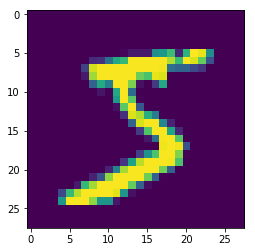

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-07-23 10:15:28.768286


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-07-23 10:15:28.942289


In [0]:
y_train[:10]
print(datetime.datetime.now())

2019-07-23 10:15:28.953156


In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-07-23 10:15:28.968540


In [0]:
Y_train[:10]
print(datetime.datetime.now())

2019-07-23 10:15:28.978113


In [0]:
## MAIN BLOCK

from keras.layers import concatenate, Input, SeparableConv2D, Activation, Add, Lambda
from keras.models import Model

x1 = Input(shape=(28,28,1))

x2 = Convolution2D(64, (3,3), border_mode='same', activation='relu')(x1)

x3 = Add()([x1,x2])
x3 = Convolution2D(64, (3,3), border_mode='same', activation='relu')(x3)

x4 = Add()([x1,x2,x3])
x4 = MaxPooling2D((2,2))(x4)
x4 = Convolution2D(64, (1, 1), activation='relu')(x4)

x5 = Convolution2D(64, (3, 3),border_mode='same', activation='relu')(x4)

x5 = Add()([x4,x5])
x6 = Convolution2D(64, (3, 3),border_mode='same', activation='relu')(x5)

x6 = Add()([x4,x5,x6])
x7 = Convolution2D(64, (3, 3),border_mode='same', activation='relu')(x6)

x8 = Add()([x5,x6,x7])
x8 = MaxPooling2D((2,2))(x8)
x8 = Convolution2D(64, (1, 1), activation='relu')(x8)

x9 = Convolution2D(64, (3, 3),border_mode='same', activation='relu')(x8)

x9 = Add()([x8,x9])
x10 = Convolution2D(64, (3, 3),border_mode='same', activation='relu')(x9)

x10 = Add()([x8,x9,x10])
x11 = Convolution2D(64, (3, 3),border_mode='same', activation='relu')(x10)

#Softmax
S_MAX = Convolution2D(64, (7,7), activation='relu')(x11)
S_MAX = Convolution2D(10, (1,1), activation='softmax')(S_MAX)
output = Flatten()(S_MAX)

model = Model(inputs=x1, outputs=output)

#model = Sequential()
#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(10, 26))
#model.add(Flatten())
#model.add(Activation('softmax'))

print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
/usr/l

2019-07-23 10:15:29.270407


In [0]:
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_27 (Conv2D)              (None, 28, 28, 64)   640         input_4[0][0]                    
__________________________________________________________________________________________________
add_17 (Add)                    (None, 28, 28, 64)   0           input_4[0][0]                    
                                                                 conv2d_27[0][0]                  
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 28, 28, 64)   36928       add_17[0][0]                     
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-07-23 10:15:29.364675


In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.1525 - acc: 0.9549
Epoch 2/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0543 - acc: 0.9830
Epoch 3/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0420 - acc: 0.9869
Epoch 4/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0363 - acc: 0.9890
Epoch 5/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0328 - acc: 0.9900
Epoch 6/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0292 - acc: 0.9911
Epoch 7/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0245 - acc: 0.9924
Epoch 8/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0224 - acc: 0.9930
Epoch 9/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0206 - acc: 0.9939
Epoch 10/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0219 - acc: 0.9937

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-07-23 10:27:13.638362


In [0]:
print(score)
print(datetime.datetime.now())

[0.04012723008609228, 0.9916]
2019-07-23 10:27:13.649842
